In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-5b905e6ca903>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0] ,date_parser=parser)

In [14]:
sales.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [7]:
sal=pd.read_csv('sales-cars.csv',index_col=0)

In [15]:
sales.shape

(36, 1)

In [9]:
sal.head(index)

,Sales
Month,
2016-01,266
2016-02,146
2016-03,183
2016-04,119
2016-05,180


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(x=sal['Sales'], model='additive', extrapolate_trend='freq', period=1)
results.plot();

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

In [3]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [5]:
sales.columns

Index(['Sales'], dtype='object')

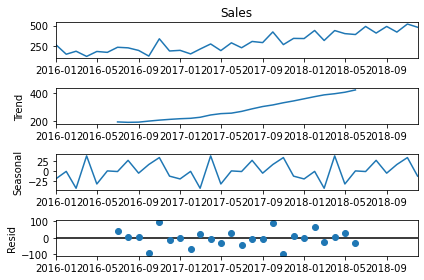

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(sales['Sales'])
results.plot();

In [4]:
sales_diff = sales.diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model

In [5]:
sales_diff

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0
2016-08-01,-7.0
2016-09-01,-32.0


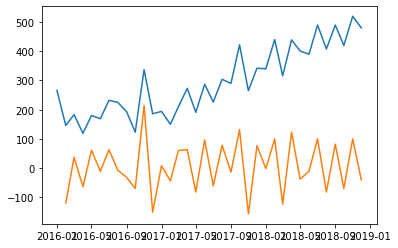

In [8]:
plt.plot(sales)
plt.plot(sales_diff)